<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [14]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [10]:
## Write your code here
dup_count = df.duplicated().sum()
print(dup_count)
dups_preview = df[df.duplicated(keep=False)].head(10)
dups_preview

20


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
8,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN


### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [12]:
## Write your code here
subset= ['MainBranch', 'Employment','RemoteWork']
dup_mask= df.duplicated(subset=subset, keep=False)
dups = df[dup_mask].copy()
group_sizes = (
    dups.groupby(subset, dropna=False)
        .size()
        .reset_index(name="rows_in_group")
        .sort_values("rows_in_group", ascending=False)
)
group_sizes.head(10)
dup_groups = dups.groupby(subset, dropna=False)

preview = []
for i, (key, g) in enumerate(dup_groups):
    preview.append(g)
    if i == 2:  # show first 3 groups
        break

preview[0]
const_by_group = (dup_groups.nunique(dropna=False) == 1)  
identical_counts = const_by_group.sum()             
total_groups = const_by_group.shape[0]
identical_ratio = (identical_counts / total_groups).sort_values(ascending=False)

print("Share of duplicate groups where each column is identical across the group:")
identical_ratio.head(20)

Share of duplicate groups where each column is identical across the group:


Check                         1.000000
AINextMuch less integrated    0.631980
ConvertedCompYearly           0.596447
BuildvsBuy                    0.571066
CompTotal                     0.560914
PurchaseInfluence             0.558376
OrgSize                       0.548223
Currency                      0.530457
Frequency_3                   0.522843
TechEndorse                   0.522843
BuyNewTool                    0.522843
ProfessionalTech              0.520305
ProfessionalCloud             0.517766
ICorPM                        0.517766
Knowledge_8                   0.515228
TBranch                       0.512690
Knowledge_5                   0.512690
Knowledge_4                   0.510152
TimeSearching                 0.510152
Industry                      0.510152
dtype: float64

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


                                             Country  Count
0                           United States of America  11065
1                                                NaN   6478
2                                            Germany   4946
3                                              India   4222
4  United Kingdom of Great Britain and Northern I...   3224


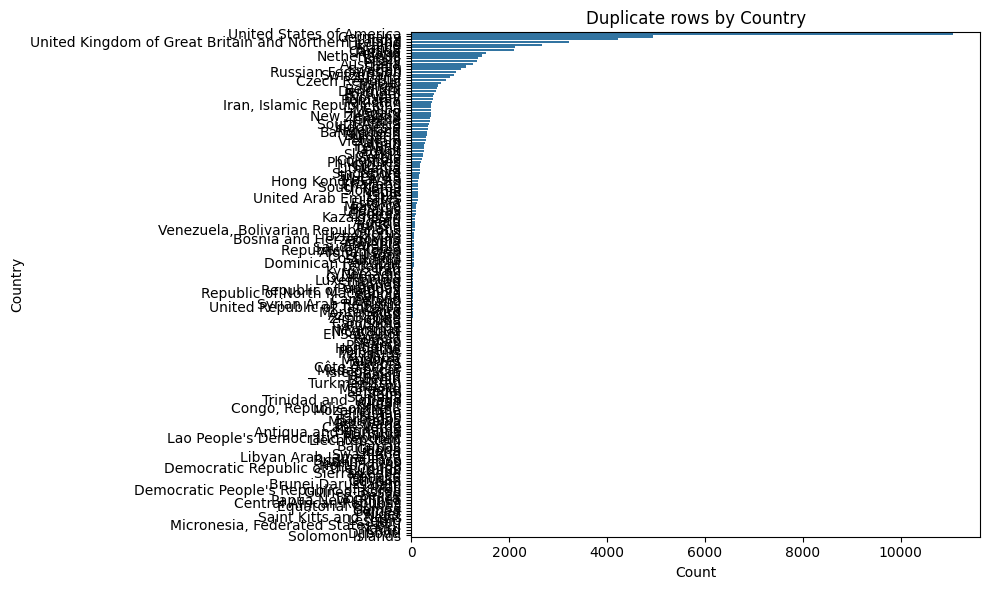

                                          Employment  Count
0                                Employed, full-time  39048
1  Independent contractor, freelancer, or self-em...   4845
2                                 Student, full-time   4713
3  Employed, full-time;Independent contractor, fr...   3558
4                 Not employed, but looking for work   2341


/tmp/ipykernel_952/3365550333.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(); plt.show()


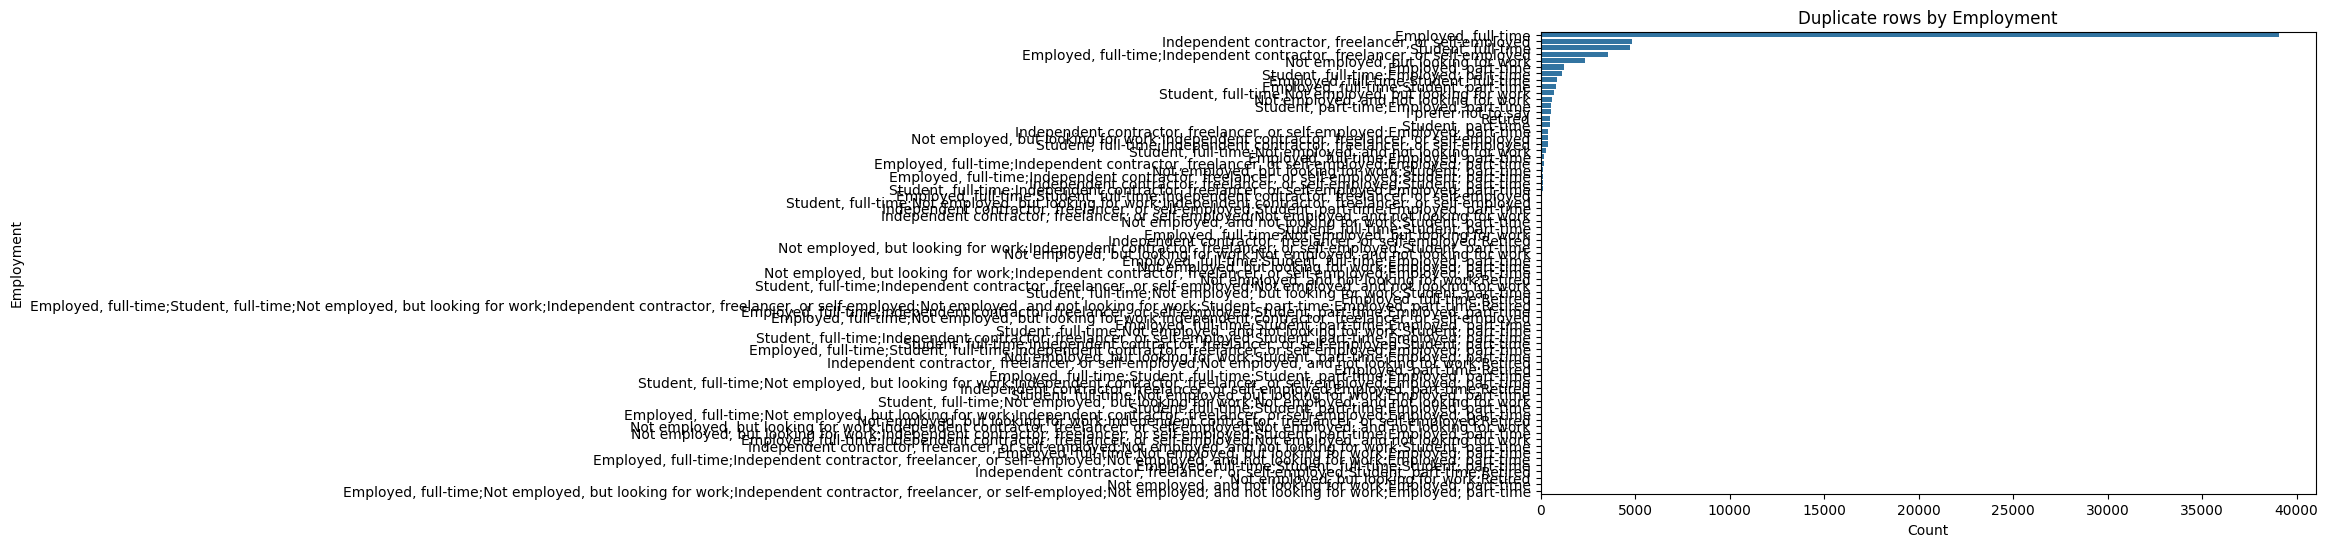

In [16]:
## Write your code here
import seaborn as sns
dups = df[df.duplicated(subset=["MainBranch","Employment","RemoteWork"], keep=False)].copy()

# -------- Country --------
country_counts = dups["Country"].value_counts(dropna=False).reset_index()
country_counts.columns = ["Country", "Count"]
print(country_counts.head())  # optional: see the table

plt.figure(figsize=(10,6))
sns.barplot(data=country_counts, x="Count", y="Country")
plt.title("Duplicate rows by Country")
plt.xlabel("Count"); plt.ylabel("Country")
plt.tight_layout(); plt.show()

# -------- Employment --------
employment_counts = dups["Employment"].value_counts(dropna=False).reset_index()
employment_counts.columns = ["Employment", "Count"]
print(employment_counts.head())  # optional

plt.figure(figsize=(10,6))
sns.barplot(data=employment_counts, x="Count", y="Employment")
plt.title("Duplicate rows by Employment")
plt.xlabel("Count"); plt.ylabel("Employment")
plt.tight_layout(); plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [ ]:
## Write your code here
import re

# Try to find a true ID column first
id_like = [c for c in df.columns if re.search(r"(respondent|response.?id|^id$|uuid|record)", c, flags=re.I)]

if id_like:
    subset = [id_like[0]]
else:
    # Fall back to a stable composite key (adjust to your dataset)
    subset = [c for c in ["MainBranch", "Employment", "RemoteWork", "Country"] if c in df.columns]

print("Using these columns to define uniqueness:", subset)

before = len(df)
df_dedup = df.drop_duplicates(subset=subset, keep="first")
after = len(df_dedup)
print(f"Removed {before - after} duplicate rows (from {before} to {after}).")

## Verify and Document Duplicate Removal Process


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
